# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
books_df = pd.read_excel('datasets/Amazon_top100_bestselling_books_2009to2021.xlsx')

In [3]:
books_df.head()

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,0,12.49,1.0,The Lost Symbol,16118.0,4.4,Dan Brown,Hardcover,2009,Fiction
1,1,13.40,2.0,The Shack: Where Tragedy Confronts Eternity,23392.0,4.7,William P. Young,Paperback,2009,Fiction
2,2,9.93,3.0,Liberty and Tyranny: A Conservative Manifesto,5036.0,4.8,Mark R. Levin,Hardcover,2009,Non Fiction
3,3,14.30,4.0,"Breaking Dawn (The Twilight Saga, Book 4)",16912.0,4.7,Stephenie Meyer,Hardcover,2009,Fiction
4,4,9.99,5.0,Going Rogue: An American Life,1572.0,4.6,Sarah Palin,Hardcover,2009,Non Fiction


# Data Analysis

In [5]:
books_df.shape

(1291, 10)

In [4]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291 entries, 0 to 1290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1291 non-null   int64  
 1   price          1287 non-null   float64
 2   ranks          1287 non-null   float64
 3   title          1286 non-null   object 
 4   no_of_reviews  1287 non-null   float64
 5   ratings        1287 non-null   float64
 6   author         1286 non-null   object 
 7   cover_type     1286 non-null   object 
 8   year           1291 non-null   int64  
 9   genre          1288 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 101.0+ KB


In [7]:
books_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1291.0,645.00,372.82,0.00,322.50,645.0,967.50,1290.0
price,1287.0,13.76,10.05,1.17,8.55,12.1,16.29,144.0
ranks,1287.0,50.25,28.80,1.00,25.00,50.0,75.00,100.0
no_of_reviews,1287.0,25827.71,32224.06,50.00,6769.00,16845.0,32326.00,344811.0
ratings,1287.0,4.65,0.20,3.40,4.60,4.7,4.80,4.9
year,1291.0,2015.03,3.73,2009.00,2012.00,2015.0,2018.00,2021.0


## Missed Value Problem

In [37]:
books_df.isnull().sum()

Unnamed: 0       0
price            0
ranks            0
title            0
no_of_reviews    0
ratings          0
author           0
cover_type       0
year             0
genre            0
dtype: int64

In [36]:
books_df.isnull().values.sum()

0

In [11]:
books_df.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [19]:
numeric_cols = books_df.select_dtypes(np.number).columns

In [20]:
numeric_cols

Index(['Unnamed: 0', 'price', 'ranks', 'no_of_reviews', 'ratings', 'year'], dtype='object')

In [27]:
books_df = books_df.fillna(books_df.median())

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [35]:
books_df.dropna(axis=0, inplace=True)

In [39]:
books_df.drop('Unnamed: 0', axis=1, inplace=True)

## Convert Data Type

In [41]:
books_df['no_of_reviews'] = books_df['no_of_reviews'].astype(np.float64)

In [42]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1285 non-null   float64
 1   ranks          1285 non-null   float64
 2   title          1285 non-null   object 
 3   no_of_reviews  1285 non-null   float64
 4   ratings        1285 non-null   float64
 5   author         1285 non-null   object 
 6   cover_type     1285 non-null   object 
 7   year           1285 non-null   int64  
 8   genre          1285 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 100.4+ KB


In [45]:
books_df['no_of_reviews']

0       16118.0
1       23392.0
2        5036.0
3       16912.0
4        1572.0
         ...   
1286    21401.0
1287    79872.0
1288    15753.0
1289     7246.0
1290    27332.0
Name: no_of_reviews, Length: 1285, dtype: float64

In [51]:
def density_plot(dataframe, col):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(dataframe[col], color='green', fill=True)

<AxesSubplot:xlabel='no_of_reviews', ylabel='Density'>

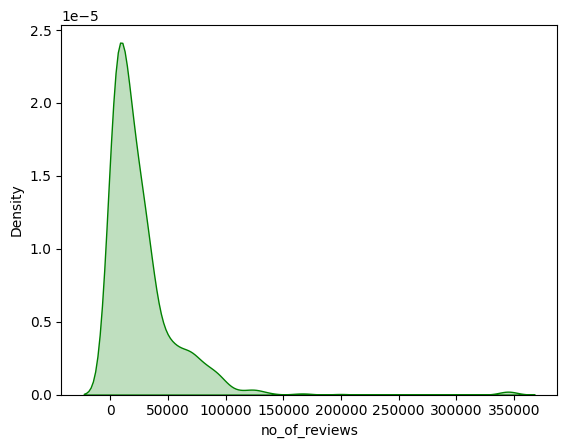

In [54]:
sns.kdeplot(books_df['no_of_reviews'], color='green', fill=True)

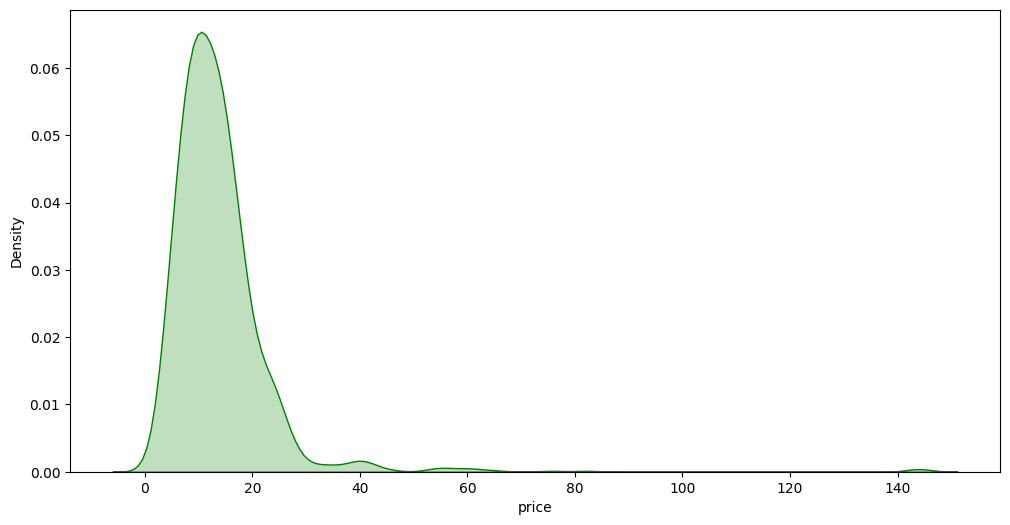

In [53]:
density_plot(books_df, 'price')